In [38]:
# 라이브러리 로드
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [40]:
# 데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Wall-Following+Robot+Navigation+Data
data = pd.read_csv('sensor_readings_24.csv',header=None)

# 데이터 열 지정
data.columns = ['US1', 'US2', 'US3', 'US4', 'US5', 'US6', 'US7', 'US8', 'US9', 'US10', 'US11', 'US12', 'US13', 'US14', 'US15', 'US16', 'US17', 'US18', 'US19', 'US20', 'US21', 'US22', 'US23', 'US24', 'Class']
data

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   US1     5456 non-null   float64
 1   US2     5456 non-null   float64
 2   US3     5456 non-null   float64
 3   US4     5456 non-null   float64
 4   US5     5456 non-null   float64
 5   US6     5456 non-null   float64
 6   US7     5456 non-null   float64
 7   US8     5456 non-null   float64
 8   US9     5456 non-null   float64
 9   US10    5456 non-null   float64
 10  US11    5456 non-null   float64
 11  US12    5456 non-null   float64
 12  US13    5456 non-null   float64
 13  US14    5456 non-null   float64
 14  US15    5456 non-null   float64
 15  US16    5456 non-null   float64
 16  US17    5456 non-null   float64
 17  US18    5456 non-null   float64
 18  US19    5456 non-null   float64
 19  US20    5456 non-null   float64
 20  US21    5456 non-null   float64
 21  US22    5456 non-null   float64
 22  

In [42]:
target=data['Class']
target

0       Slight-Right-Turn
1       Slight-Right-Turn
2       Slight-Right-Turn
3       Slight-Right-Turn
4       Slight-Right-Turn
              ...        
5451         Move-Forward
5452     Sharp-Right-Turn
5453     Sharp-Right-Turn
5454         Move-Forward
5455     Sharp-Right-Turn
Name: Class, Length: 5456, dtype: object

In [43]:
data = data.drop(columns = data.columns[24])
data

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,5.000,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.894,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.873,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,5.000,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118


In [44]:
quartile_1 = data[:].quantile(0.25)
quartile_3 = data[:].quantile(0.75)
IQR = quartile_3 - quartile_1
IQR

US1     0.89300
US2     1.31950
US3     1.20050
US4     2.36250
US5     2.54050
US6     2.04950
US7     3.06925
US8     1.57500
US9     3.20025
US10    1.89025
US11    1.63725
US12    0.98850
US13    1.16700
US14    1.70825
US15    3.57625
US16    0.46900
US17    0.33200
US18    0.30725
US19    0.33400
US20    0.32125
US21    0.43525
US22    1.32525
US23    0.76750
US24    0.77325
dtype: float64

In [45]:
outlier_data = []

for i in range(0,24) :
    outlier = data[(data[data.columns[i]] < (quartile_1[i] - 1.5 * IQR[i])) | (data[data.columns[i]] > (quartile_3[i] + 1.5 * IQR[i]))]
    outlier_ratio = len(outlier) / len(data)
    outlier_data.append(outlier_ratio)

outlier_data

[0.03610703812316716,
 0.17705278592375367,
 0.16000733137829912,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15175953079178886,
 0.16788856304985336,
 0.0,
 0.0,
 0.09200879765395895,
 0.09567448680351906,
 0.10245601173020528,
 0.13306451612903225,
 0.13874633431085043,
 0.08797653958944282,
 0.18328445747800587,
 0.1315982404692082,
 0.10043988269794721]

In [46]:
seed = 5456

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.7, random_state=seed)

In [47]:
dt_clf = DecisionTreeClassifier(random_state=5456)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=5456)

In [48]:
target_names=target.unique()
target_names

array(['Slight-Right-Turn', 'Sharp-Right-Turn', 'Move-Forward',
       'Slight-Left-Turn'], dtype=object)

In [49]:
feature_names=data.columns
feature_names

Index(['US1', 'US2', 'US3', 'US4', 'US5', 'US6', 'US7', 'US8', 'US9', 'US10',
       'US11', 'US12', 'US13', 'US14', 'US15', 'US16', 'US17', 'US18', 'US19',
       'US20', 'US21', 'US22', 'US23', 'US24'],
      dtype='object')

In [50]:
export_graphviz(dt_clf, out_file="tree.dot", class_names = target_names, feature_names = feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


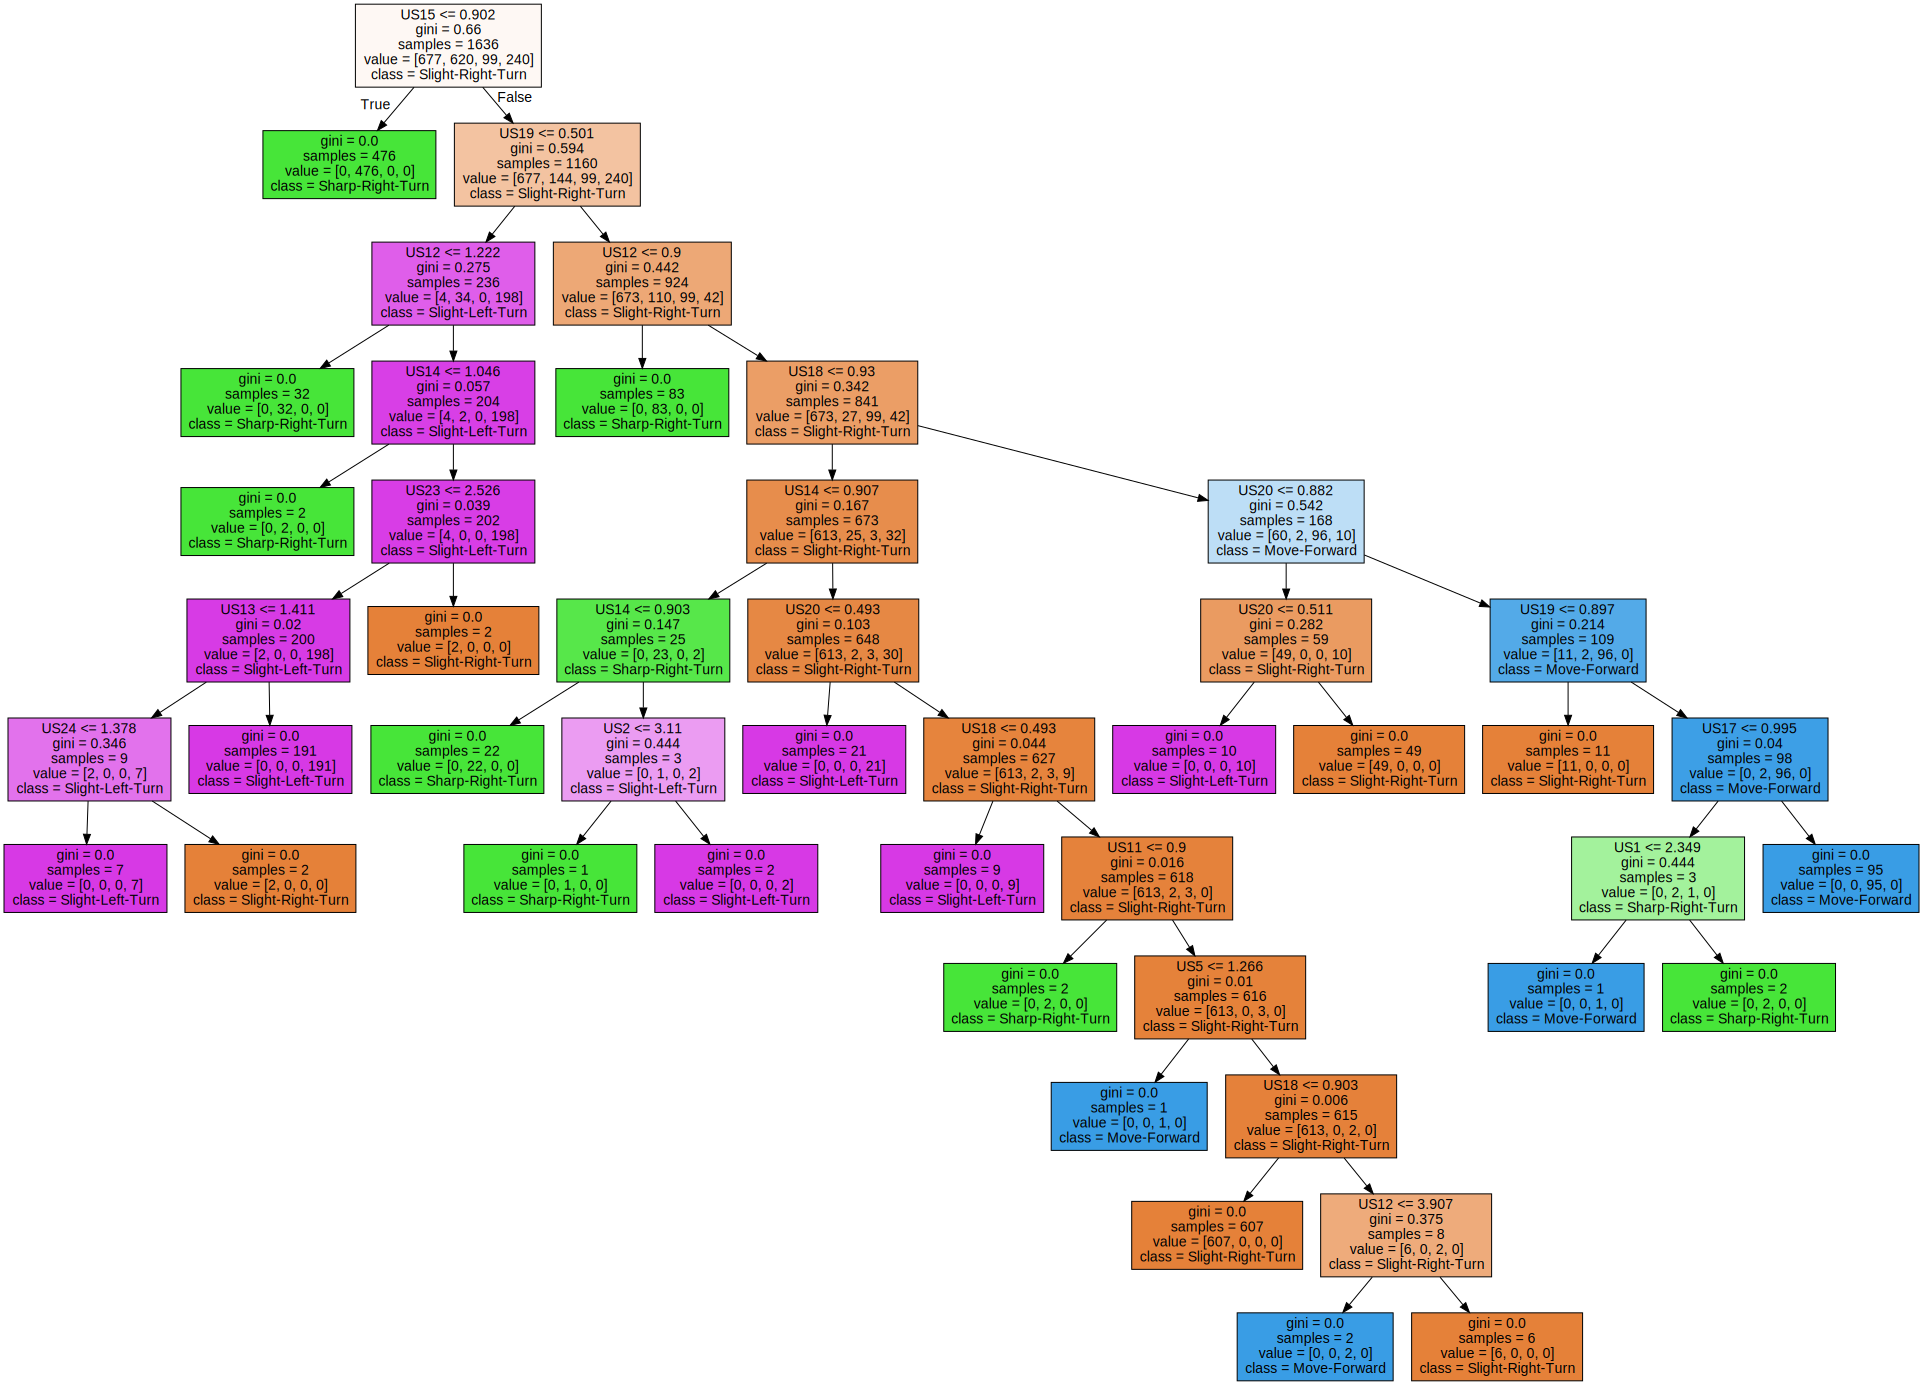

In [51]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [52]:
graphviz.Source(dot_graph).render('tree', format="png")

'tree.png'

In [53]:
y_pred = dt_clf.predict(x_test)

In [54]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='micro')
precision = mt.precision_score(y_test, y_pred, average='micro')
f1_score = mt.f1_score(y_test, y_pred, average='micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9863874345549738 

Accuracy:  0.99 

Recall:  0.99 

Precision:  0.99 

F1_score:  0.99 

Confusion Matrix: 
 [[1504    1   13   10]
 [   5 1471    1    0]
 [   0    1  228    0]
 [  20    1    0  565]]


In [55]:
# 교차검증

x = data
y = target

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9770934687066678


In [56]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.038989,0.001999,0.955128
1,0.040888,0.001997,0.980752
2,0.044817,0.003046,0.971586
3,0.041833,0.001995,0.994500
4,0.039931,0.001996,0.983501


In [57]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9863874345549738

In [58]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


Accuracy of training set: 0.823
Accuracy of test set: 0.821


In [59]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = target_names, feature_names = feature_names, impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


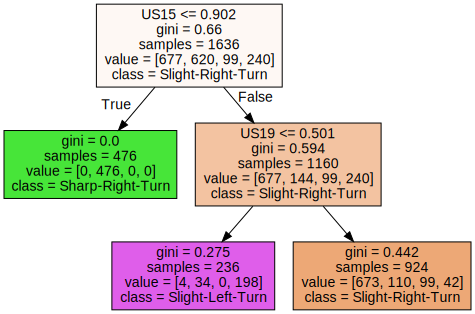

In [60]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [61]:
y_pred = pruned_dt_clf.predict(x_test)

In [62]:
# 학습결과 평가
print("Train_Accuracy : ", pruned_dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", pruned_dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='micro')
precision = mt.precision_score(y_test, y_pred, average='micro')
f1_score = mt.f1_score(y_test, y_pred, average='micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.8233496332518337 

Test_Accuracy :  0.8206806282722513 

Accuracy:  0.82 

Recall:  0.82 

Precision:  0.82 

F1_score:  0.82 

Confusion Matrix: 
 [[1523    0    0    5]
 [ 269 1136    0   72]
 [ 229    0    0    0]
 [ 109    1    0  476]]


In [63]:
# 교차검증

x = data
y = target

# 각 폴드의 스코어 
scores = cross_val_score(pruned_dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.8200150750563215


In [64]:
pd.DataFrame(cross_validate(pruned_dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.018402,0.003042,0.817766
1,0.016905,0.002045,0.834097
2,0.014970,0.001993,0.813016
3,0.016015,0.001992,0.818515
4,0.016967,0.000988,0.816682


In [65]:
# test set에 대한 스코어(정확도)
pruned_dt_clf.score(x_test, y_test)

0.8206806282722513

In [66]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.894
Accuracy of test set: 0.896


In [71]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=4, random_state=156) # max_depth=4으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.917
Accuracy of test set: 0.915


In [72]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = target_names, feature_names = feature_names, impurity=True, filled=True)

[ max_depth가 4인 경우의 Decision Tree 시각화 ]


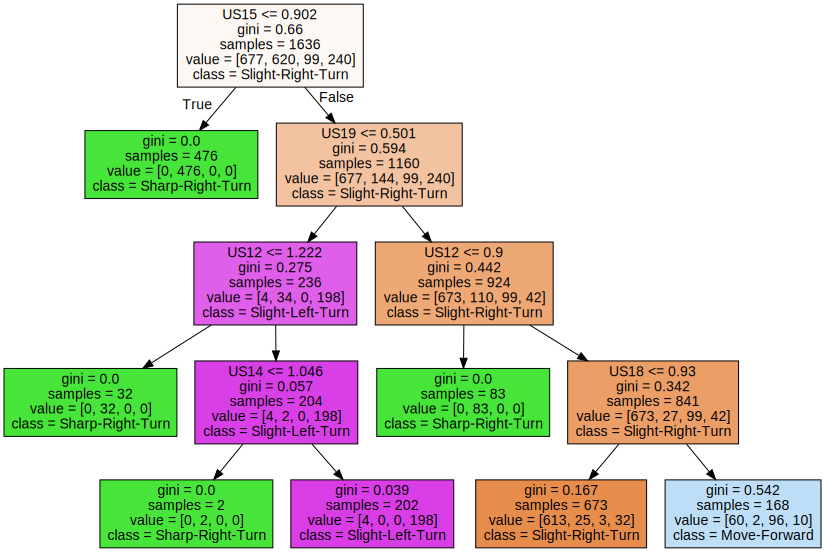

In [73]:
print('[ max_depth가 4인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [74]:
graphviz.Source(dot_graph).render('tree', format="png")

'tree.png'

In [68]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=5, random_state=156) # max_depth=5으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.962
Accuracy of test set: 0.955


In [69]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=6, random_state=156) # max_depth=6으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.985


In [70]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=7, random_state=156) # max_depth=7으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.996
Accuracy of test set: 0.987
